<a href="https://colab.research.google.com/github/Mariam-Nazlawy/NLP/blob/main/NLP_Task2_20201161_20200287.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers

In [2]:
pip install nltk

In [3]:
import numpy as np
import re
import nltk
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **Read the document**

In [4]:
gen = pipeline('text-generation', model ='EleutherAI/gpt-neo-2.7B')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/10.7G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

In [138]:
topics = np.array(['Software Engineering', 'Artificial Intelligience', 'Robotics', 'Economics', 'Trading', 'Time Management', 'Procutivity', 'Business', 'Career', 'Big Data'])
phrases = []
for topic in topics:
  phrases += [gen.predict(topic)[0]['generated_text']]
phrases

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['Software Engineering Management\n\nWhen the topic of automation and technology is brought up, many of your employees will take offense with the idea that automation will be able to do the job of a human. When you get into how automation will disrupt your business and',
 'Artificial Intelligience\n\n“Artificial intelligence is the ability of computer systems to think and act like the human beings that are using them,” according to the late Marvin Minsky, the co-discoverer of neural networks',
 'Robotics is a good word to use for the technology that allows robots to work with human beings by taking directions and carrying out some of their daily tasks. It is a good word to use to describe the whole body of things that involve robots. For',
 'Economics-Economists, History-Government, Political Science-History(Theory), Political Science-Political History-Government(Politics, Public Policy)\n\nSunday, February 10, 2014\n\nThe Economic Theory of "The Good Society"',
 'Trading in oil for go

In [139]:
phrases

['Software Engineering Management\n\nWhen the topic of automation and technology is brought up, many of your employees will take offense with the idea that automation will be able to do the job of a human. When you get into how automation will disrupt your business and',
 'Artificial Intelligience\n\n“Artificial intelligence is the ability of computer systems to think and act like the human beings that are using them,” according to the late Marvin Minsky, the co-discoverer of neural networks',
 'Robotics is a good word to use for the technology that allows robots to work with human beings by taking directions and carrying out some of their daily tasks. It is a good word to use to describe the whole body of things that involve robots. For',
 'Economics-Economists, History-Government, Political Science-History(Theory), Political Science-Political History-Government(Politics, Public Policy)\n\nSunday, February 10, 2014\n\nThe Economic Theory of "The Good Society"',
 'Trading in oil for go

## **Preprocessing the document**
1. Convert all text to lower case
2. Remove stop words like ("he", "she", "is", "the", ...)
3. Remove punctuation
4. Lemmatize the words (get the inf of the word)

In [28]:
def text_preprocessing(document):
    """
    Preprocesses a document for natural language processing.
    """

    # Lowercase the text
    document = document.lower()

    # Remove punctuation
    document = re.sub(r"[^\w\s]", "", document)

    # Remove stop words
    stop_words = set(nltk.corpus.stopwords.words("english"))
    words = document.split()
    words = [word for word in words if word not in stop_words]

    # lemmatize the words
    lemmatizer = nltk.stem.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # remove words with less then 3 characters
    words = [word for word in words if len(word) > 3]

    # Join the words back into a document
    document = " ".join(words)

    return document


In [140]:
list_of_text = []
for phrase in phrases:
  # for line in phrase.splitlines():
  processed = text_preprocessing(phrase)
  list_of_text.append(processed)
print(list_of_text)
print(len(list_of_text))

['software engineering management topic automation technology brought many employee take offense idea automation able human automation disrupt business', 'artificial intelligience artificial intelligence ability computer system think like human being using according late marvin minsky codiscoverer neural network', 'robotics good word technology allows robot work human being taking direction carrying daily task good word describe whole body thing involve robot', 'economicseconomists historygovernment political sciencehistorytheory political sciencepolitical historygovernmentpolitics public policy sunday february 2014 economic theory good society', 'trading gold financial implication sinking near record threat global recession lurking distance possibility gold used hedge falling declining price', 'time management social world professional manage time different teenager anyone else example typical professional spends vast majority time planning planning planning', 'procutivity looking dat

## Find the unique words

In [141]:
def find_unique_words(list_of_text):
  unique_words = []
  for txt in list_of_text:
    unique_words += txt.split()
  return set(unique_words)

In [142]:
unique_words = find_unique_words(list_of_text)
print(len(unique_words))
print(unique_words)

150
{'minsky', 'disrupt', 'social', 'trading', 'concerned', 'ability', 'museum', 'procutivity', 'direction', 'example', 'business', 'intelligience', 'sciencepolitical', 'society', 'offense', 'majority', 'economic', 'economicseconomists', 'hedge', 'late', 'good', 'implication', 'planning', 'sinking', '2014', 'codiscoverer', 'come', 'used', 'coffeesipping', 'software', 'studied', 'think', 'metric', 'london', 'thing', 'according', 'left', 'story', 'anyone', 'without', 'like', 'pointed', 'automation', 'view', 'performing', 'qualifying', 'work', 'either', 'declining', 'career', 'robot', 'focused', 'word', 'year', 'global', 'system', 'allows', 'describe', 'neural', 'recession', 'marvin', 'february', 'brought', 'productivity', 'price', 'different', 'intelligence', 'houston', 'discussing', 'idea', 'record', 'many', 'living', 'device', 'artificial', 'policy', 'gold', 'degree', 'historygovernmentpolitics', 'body', 'taking', 'professional', 'using', 'political', 'following', 'financial', 'employe

In [143]:
for word in unique_words:
  if len(word) < 3:
    print(word)

In [144]:
list_of_text_Cpy1 = list_of_text_Cpy2 = list_of_text.copy()
vectorizer = TfidfVectorizer()
tf_idf_sklearn = vectorizer.fit_transform(list_of_text_Cpy1)

In [145]:
tf_idf_sklearn = tf_idf_sklearn.toarray()
for i in range(10):
  print(i)
  print(tf_idf_sklearn[i, :])
  print('------------------------------------------------------------------')

0
[0.         0.         0.         0.20979026 0.         0.
 0.         0.         0.         0.62937079 0.         0.
 0.20979026 0.17834089 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.20979026 0.         0.         0.
 0.         0.         0.20979026 0.20979026 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.1560272  0.20979026 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.17834089 0.20979026 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.20979026 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.       

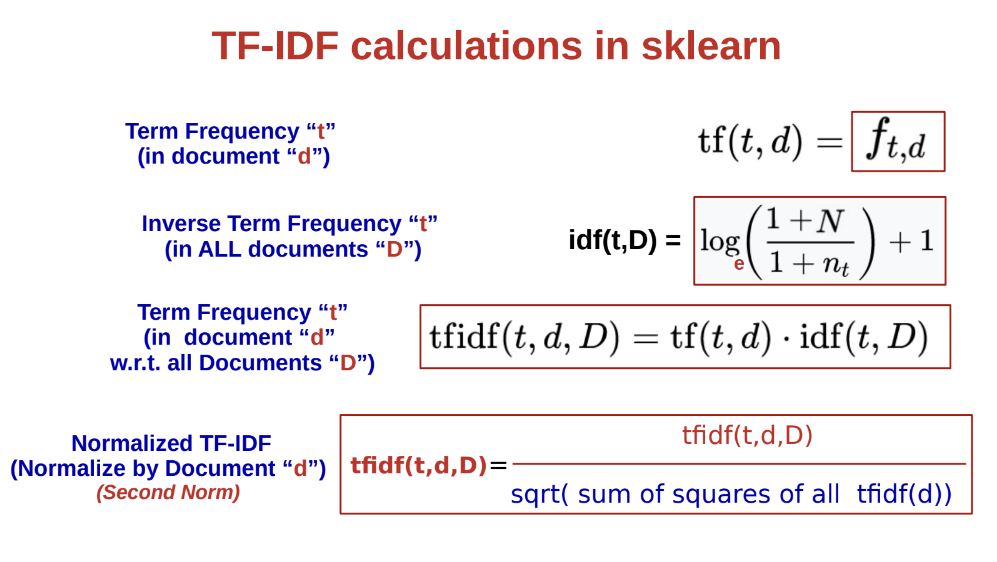

In [190]:
def tf_idf(corpos):
  res = []

  unique = list(find_unique_words(corpos))

  for i in range(len(corpos)):
    i_th_document = []

    for j in range(len(unique)):
      tf = corpos[i].count(unique[j])

      count = 0
      for k in range(len(corpos)):
        if unique[j] in corpos[k]:
          count += 1

      idf = np.log((len(corpos) + 1) / (count + 1)) + 1

      i_th_document.append(tf * idf)

    i_th_document = i_th_document / np.sqrt(np.sum(np.sqrt(i_th_document)))
    res.append(i_th_document)

  return res

In [191]:
tf_idf_scratch = tf_idf(list_of_text_Cpy2)

In [192]:
for i in range(10):
  print(i)
  print(tf_idf_scratch[i][:])
  print('------------------------------------------------------------------')

0
[0.         0.50733203 0.         0.         0.         0.
 0.         0.         0.         0.         0.43127858 0.
 0.         0.         0.50733203 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.50733203
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.52199609 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.50733203 0.         0.         0.
 0.         0.         0.         0.50733203 0.         0.50733203
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.50733203 0.         0.         0.
 0.         0.43127858 0.         0.         0.         0.
 0.         0.         0.         0.  

In [193]:
np.array(tf_idf_scratch).shape

(10, 150)

In [194]:
tf_idf_sklearn.shape

(10, 150)